# Homework 5: Deep Learning Basic

#### Created by Xi Peng, May 2021

## 1. Introduction

In this homework you will answer questions to help you understand basic knowledge of deep learning and neural networks. You will also use Pytorch to implement Fully-Connected Feedforward Network and Convolutional Neural Network for image classification. 

### What do you need to submit?
#### a) "hw5.pynb" (runable with your codes and answers).

## 2 Questions and Answers [20 points]

Answer following questions. For mathmetical inputs, if you are not familiar with Latex, you can write the proof on paper, scan, and paste the copies right after the questions.

### 2.1 Understanding [10 points]

The theorem indicates that any continueous function $f: \mathbb{R}^N \rightarrow \mathbb{R}^M$ can be realized by a network with one hidden layer (given enough hidden neurons). In this case, why do we prefer a deep neural network with many layers rather than a wide neural network with only one layer but many neurons?

A deeper neural network with many layers is better at generalization and a wider network would in general take longer to train (although this depends on how wide, how deep the networks its being compared to, and the given data).

### 2.2 Understanding [10 points]

Based on your understanding, summarize the pros and cons of DNNs compared with classical machine learning models such as logistic regression and SVM. For instance, you can talk about given a specific machine learning task, in which case we should choose classical machine learning models, and in which case we may consider deep learning models.

Pros:
Good with large datasets and/or high dimension data

When compared to SVM, you don't need to worry about using what kind of kernel

Widely applicable (can at the very least be used for both classification and regression problems)

Typically does no worse then other classical machine learning models


Cons:
Neural networks can be very expensive and time consuming to use

Amount of training data needs to be relatively high and for smaller data size SVM might be better

Compared to logistic regression, neural networks are more flexible, which may lead to overfitting

A neural network is more complex than logistic regression


## 3 Fully-Connected Feedforward Network for Image Classfication [40 points]

In this section, we will use Pytorch to implement a Fully-Connected Feedforward Network for image classfication on CIFAR10.
Please read the Pytorch tutorial (https://pytorch.org/tutorials/beginner/basics/intro.html) to understand basic operations of Tensors, Dataloader, Automatic Differentiation and Model Optimization.

### 3.1 Dataloader

CIFAR10 dataset has 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size. 

We will load and normalize the CIFAR10 training and test datasets using torchvision. The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


We will visualize some training images using the following code. 

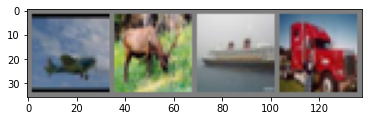

plane  deer  ship truck
torch.Size([4, 3, 32, 32])


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.shape)


### 3.2 Define a Fully-Connected Feedforward Network

We will implement a 3-layer Fully-Connected Feedforward Network. The network architecture: 2 hidden layers (128, 64 units respectively) and 1 output layer. We will use relu as the activation function except for the output layer. 

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        ### START CODE HERE ###
        input = 3*32*32
        self.fc1 = nn.Linear(input, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        ### END CODE HERE ###

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

### 3.3 Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [4]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 3.4 Train the network

We will loop over our data iterator, and feed the inputs to the network and optimize. 

In [5]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
 
        ### START CODE HERE ###

        out = net(inputs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()    
        optimizer.zero_grad()    
        ### END CODE HERE ###

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

KeyboardInterrupt: ignored

Please plot the training loss curve. 

### 3.5 Test the network on the test data

Please use the following code to compute the classification accuracy on the test data and think about how to improve the model performance.

In [6]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        ### START CODE HERE ### 
        out = net(images)
        aaa, predicted = torch.max(out.data, 1)
        ### END CODE HERE ###
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 26 %


## 4 Convolutional Neural Network for Image Classfication [40 points]

Implement a Convolutional Neural Network (LeNet) based on what you have implemented in Section 3. 
- Network architecture: 
  Convolutional layer with 6 filters while each filter's resolution is 5 by 5  → relu → Max Pooling with size of 2 → Convolutional layer with 16 filters while each filter's resolution is 5 by 5 → relu → Max Pooling with size of 2 → Fully-Connected layer with size of 120 → relu → Fully-Connected layer with size of 84 → relu → Fully-Connected layer with size of 10.
- Repeat the training/testing process similar to Section 3, plot the training loss curve and report the      classification accuracy on the test data. 

You can use the following code to implement the Convolutional Neural Network.

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        ### START CODE HERE ###
        input = (16*5*5)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(input, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        ### END CODE HERE ###

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
trainloss1=[]

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        ### START CODE HERE ###
        out = net(inputs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()    
        optimizer.zero_grad() 
        ### END CODE HERE ###

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            trainloss1.append(running_loss)
            running_loss = 0.0

print('Finished Training')

In [ ]:
plt.plot(trainloss1)
plt.show()

NameError: ignored

In [ ]:
correct1 = 0
total1 = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        ### START CODE HERE ###
        out = net(images)
        aaa, predicted = torch.max(out.data, 1)       
        ### END CODE HERE ###
        
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct1 /total1 ))
#I eventually got the "You cannot currently connect to a GPU due to usage limits in Colab" message and I was unable to continue

Accuracy of the network on the 10000 test images: 10 %
